In [1]:
### Scraping London Air BNB Data

In [2]:
# Loading all necessary libraries

library(tidyverse) # loading this library so it allows us to tidy up and graph our data findings
library(magrittr) # loading this library so it allows us to use the pipe operator.
library(purrr) # loading this library so it allows us to create and work with functions
library(glue) # loading this library so it allows us to concatenate variable when it is specified.
library(stringr) # loading this library so it allows us to utilise string manipulations.
library(rvest) # loading this library so it allows us to use functions for web scraping.
library(jsonlite) # loading this library so it allows us to use functions when dealing with files in a JSON format.
library(ggplot2) # loading this library so it allows us to plot graphs
library(httr) #  loading this library so it allows us to access and interact with APIS

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [3]:
# Reading in the CSV that contains all the data about Air BNBs in London
london_airbnb <- read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 87946 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (24): listing_url, source, name, description, neighborhood_overview, pi...
dbl  (37): id, scrape_id, host_id, host_listings_count, host_total_listings_...
lgl   (9): host_is_superhost, host_has_profile_pic, host_identity_verified, ...
date  (5): last_scraped, host_since, calendar_last_scraped, first_review, la...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# looking into the CSV and viewing the variable names
glimpse(london_airbnb) 

Rows: 87,946
Columns: 75
$ id                                           <dbl> 92644, 93015, 13913, 1540…
$ listing_url                                  <chr> "https://www.airbnb.com/r…
$ scrape_id                                    <dbl> 2.023091e+13, 2.023091e+1…
$ last_scraped                                 <date> 2023-09-06, 2023-09-06, …
$ source                                       <chr> "city scrape", "city scra…
$ name                                         <chr> "Rental unit in Earlsfiel…
$ description                                  <chr> "<b>The space</b><br />Hi…
$ neighborhood_overview                        <chr> NA, "A bit of history abo…
$ picture_url                                  <chr> "https://a0.muscache.com/…
$ host_id                                      <dbl> 498201, 499704, 54730, 60…
$ host_url                                     <chr> "https://www.airbnb.com/u…
$ host_name                                    <chr> "Dee Dee", "Sarah", "Alin…
$ host_since   

In [5]:
# cleaining up the price column to remove $ symbols

london_airbnb$price <- as.numeric(gsub(",", "", gsub("\\$", "", london_airbnb$price)))

In [6]:
# wrangling the data and creating a table with the selected variables

london_airbnb <- (london_airbnb %>% select(price,bathrooms_text, bedrooms))
london_airbnb

price,bathrooms_text,bedrooms
<dbl>,<chr>,<dbl>
42,1.5 shared baths,NA
175,1 bath,2
79,1 shared bath,NA
150,1 bath,1
46,1 shared bath,NA
476,2 baths,3
371,2 baths,2
250,1.5 baths,1
75,1 bath,1


In [7]:
# API key for fixer.io a live exchange rate site so we can convert the price column from GBP to NZD

api_key <- "58c8eb71a98bc0e70380918c4ec1041c"

In [8]:
# making a GET request to get the exchange rate data for GBP to NZD
response <- GET(paste0("http://data.fixer.io/api/latest?access_key=", api_key, "&symbols=GBP,NZD"))

In [9]:
# parsing the JSON data to create a data structure and makes it easier to work with
data <- fromJSON(content(response, as = "text"))

In [10]:
# calculating the exchange of GBP to NZD
exchange_rate_gbp_to_nzd <- data$rates$NZD / data$rates$GBP

In [11]:
# swapping the previous price column with the new price in NZD
london_airbnb$price_nzd <- london_airbnb$price * exchange_rate_gbp_to_nzd

In [12]:
# creating the same table with the new price in NZD
london_airbnb_nzd <- london_airbnb %>%
  mutate(price_nzd = price * exchange_rate_gbp_to_nzd) %>%
  select(price_nzd, bathrooms_text, bedrooms)

london_airbnb_nzd

price_nzd,bathrooms_text,bedrooms
<dbl>,<chr>,<dbl>
86.91186,1.5 shared baths,NA
362.13274,1 bath,2
163.47707,1 shared bath,NA
310.39949,1 bath,1
95.18918,1 shared bath,NA
985.00106,2 baths,3
767.72141,2 baths,2
517.33249,1.5 baths,1
155.19975,1 bath,1


In [13]:
# subsetting the data to the first 100 rows as the data contains 46,000 rows
subset_data <- london_airbnb[1:100, ]

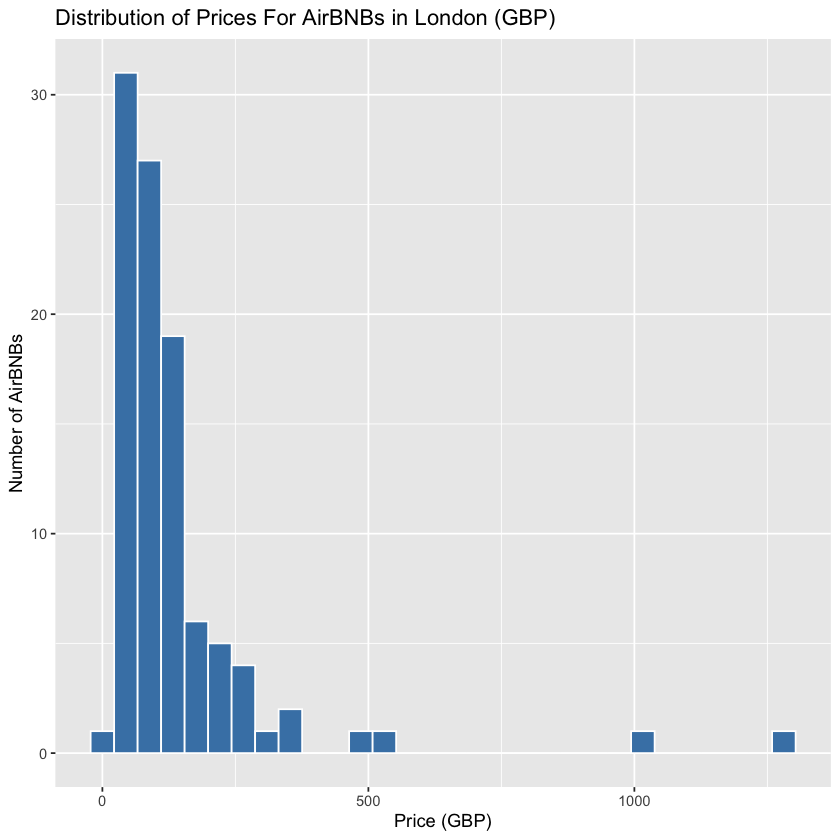

In [14]:
# creating a plot for the price distribution 
p1 <- ggplot(subset_data, aes(x = price)) + 
  geom_histogram(fill = "steelblue", color = "white", bins = 30) + 
  ggtitle("Distribution of Prices For AirBNBs in London (GBP)") + 
  xlab("Price (GBP)") + 
  ylab("Number of AirBNBs")
  

p1

Warning message:
“Removed 1882 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


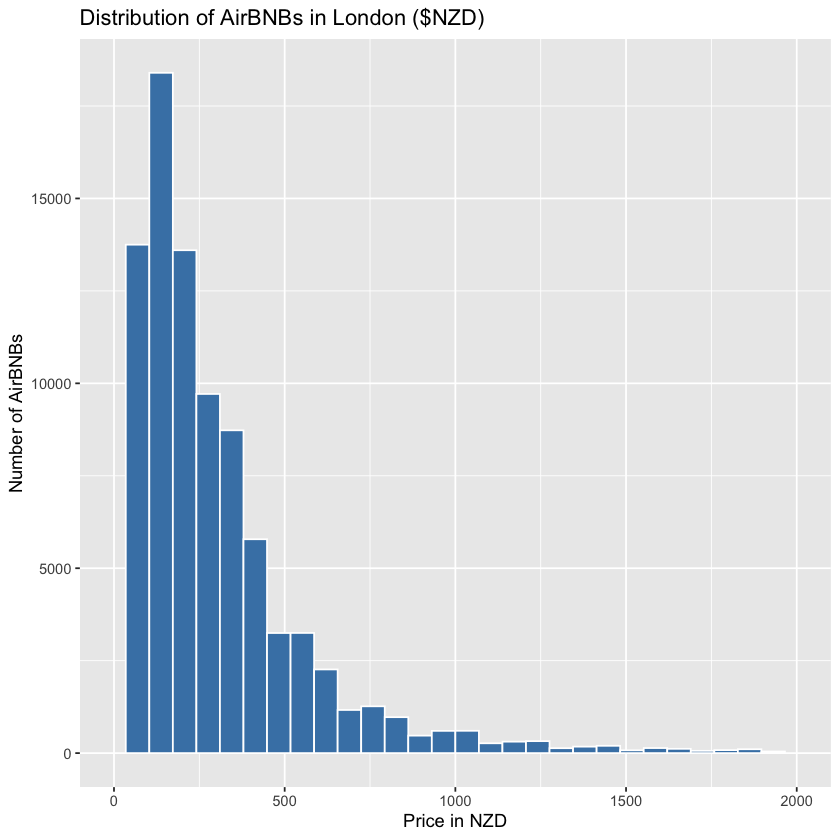

In [15]:
# creating a plot for the price distribution in NZD
p2 <- ggplot(london_airbnb_nzd, aes(x = price_nzd)) + 
  geom_histogram(fill = "steelblue", color = "white", bins = 30) + 
  ggtitle("Distribution of AirBNBs in London ($NZD)") + 
  xlab("Price in NZD") + 
  ylab("Number of AirBNBs") +
  scale_x_continuous(limits = c(0, 2000))

p2

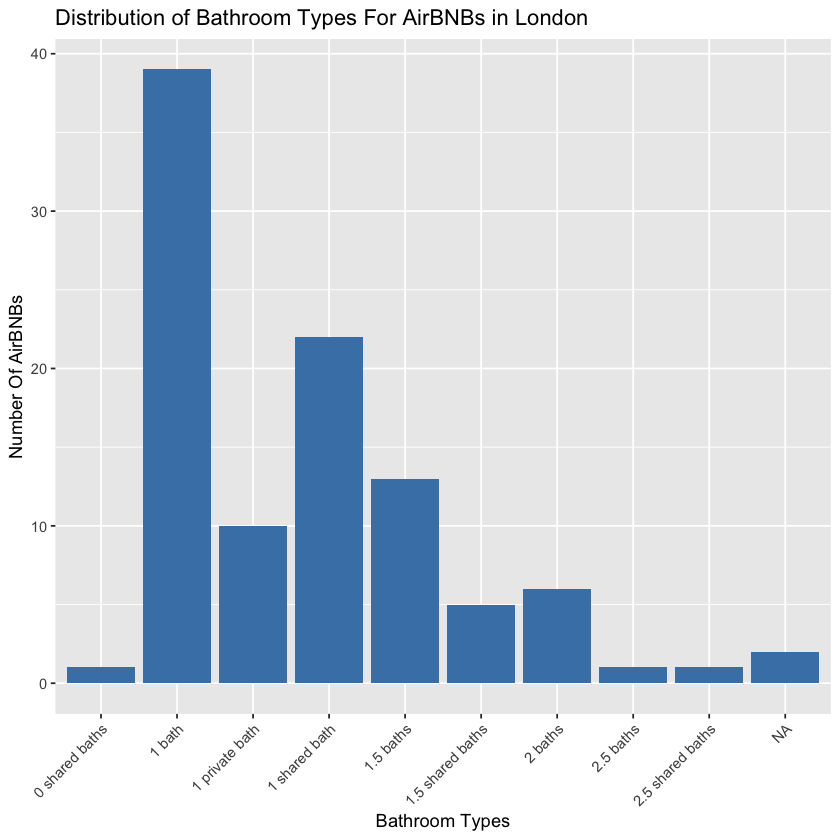

In [16]:
# creating a plot for the distribution of bathrooms

p3 <- ggplot(subset_data, aes(x = bathrooms_text)) + 
  geom_bar(fill = "steelblue") + 
  ggtitle("Distribution of Bathroom Types For AirBNBs in London") + 
  xlab("Bathroom Types") + 
  ylab("Number Of AirBNBs") + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p3

Warning message:
“Removed 45 rows containing missing values (`geom_point()`).”


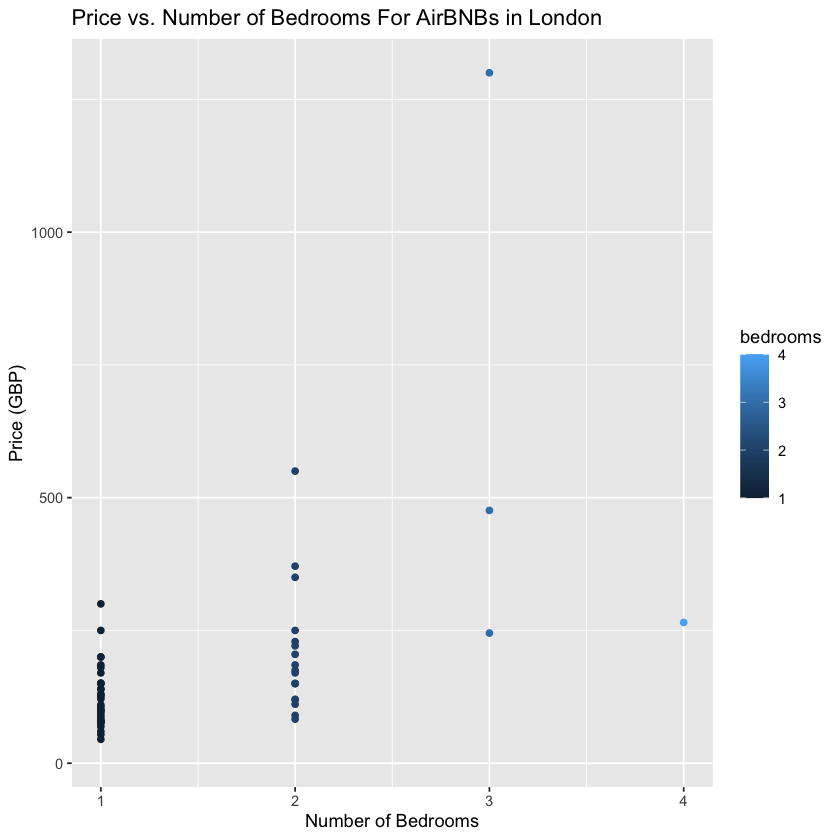

In [17]:
# plotting the price in GBP against amount of bedrooms

p4 <- ggplot(subset_data, aes(x = bedrooms, y = price)) + 
  geom_point(aes(color = bedrooms)) + 
  ggtitle("Price vs. Number of Bedrooms For AirBNBs in London") + 
  xlab("Number of Bedrooms") + 
  ylab("Price (GBP)")
p4

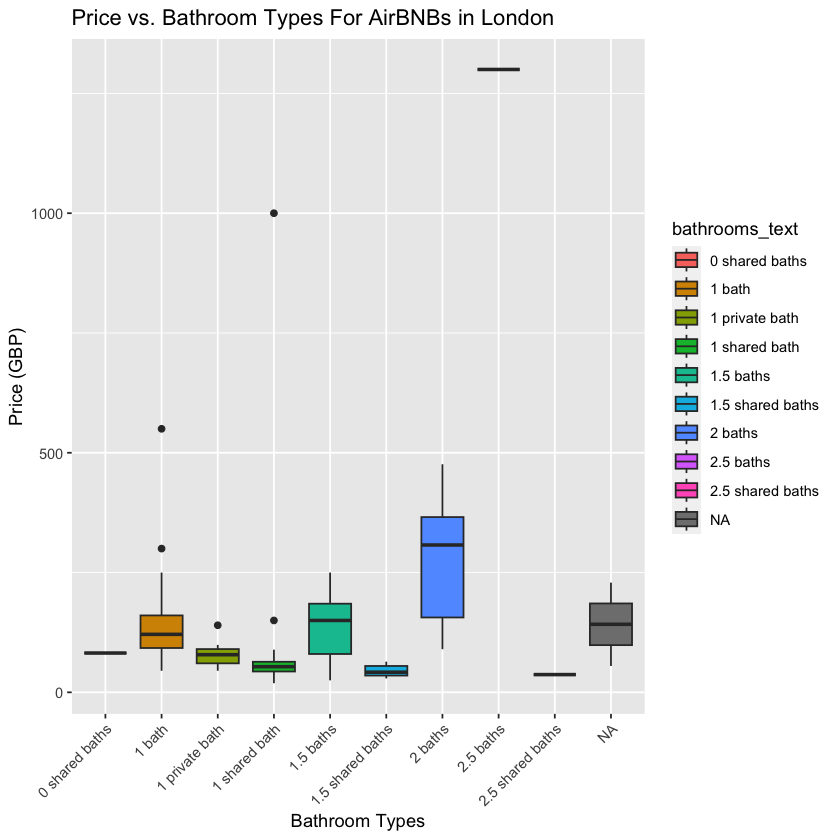

In [18]:
# plotting the price against amount of bathrooms

p5 <- ggplot(subset_data, aes(x = bathrooms_text, y = price)) + 
  geom_boxplot(aes(fill = bathrooms_text)) + 
  ggtitle("Price vs. Bathroom Types For AirBNBs in London") + 
  xlab("Bathroom Types") + 
  ylab("Price (GBP)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
p5